In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# read and clean
my_data = pd.read_csv("Mendeley.csv")
df = my_data.iloc[:,2:]
df_copy = df.copy()
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])

# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
cleanup_nums = {"Gender":{"M": 1, "F": 0}, "CLASS":{"Y":1, "N":0 }}

# implement the replacing
df_copy = df_copy.replace(cleanup_nums)

In [41]:
from sklearn.model_selection import train_test_split
X = df_copy.iloc[:,0:11].to_numpy()
y = df_copy.iloc[:,11].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
# Implement models and compare
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

hungry_model_ls = [SVC(kernel="linear", probability = True), RandomForestClassifier(), LogisticRegression(max_iter=1000),KNeighborsClassifier()]
full_model_ls =[]
for model in hungry_model_ls:
    model.fit(X_train,y_train)
    full_model_ls.append(model)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"The accuracy {model} of  is {accuracy}")
    print(metrics.confusion_matrix(y_test, y_pred))

The accuracy SVC(kernel='linear', probability=True) of  is 0.9789029535864979
[[ 21   1]
 [  4 211]]
The accuracy RandomForestClassifier() of  is 0.9957805907172996
[[ 21   1]
 [  0 215]]
The accuracy LogisticRegression(max_iter=1000) of  is 0.9873417721518988
[[ 21   1]
 [  2 213]]
The accuracy KNeighborsClassifier() of  is 0.9282700421940928
[[ 11  11]
 [  6 209]]


In [59]:
# ROC analysis
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])  # this is to create a result table
for model in hungry_model_ls:
    model.fit(X_train,y_train)
    full_model_ls.append(model)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)  # false positive and true positive
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)


/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_75916/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_75916/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_75916/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_75916/265507876.py:11: FutureWarning: The frame.append method 

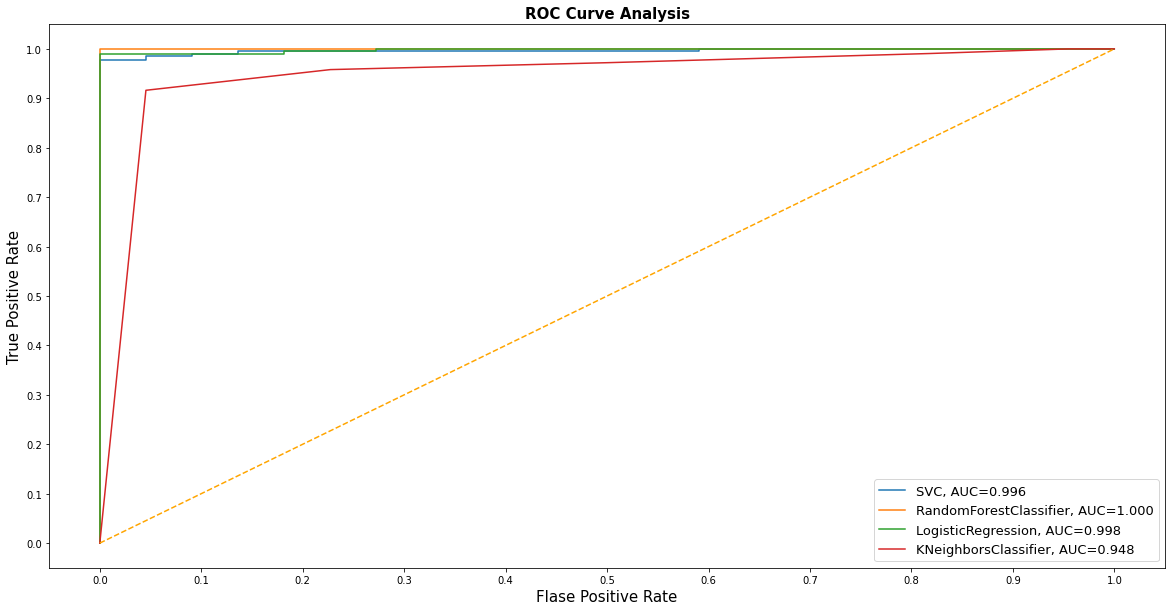

In [60]:
fig = plt.figure(figsize=(20,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()